In [1]:
%config IPCompleter.greedy = True

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import os
import datetime

import cv2

from matplotlib import pyplot as plt

%matplotlib inline

We set the random seed so that the results don't vary drastically.

In [4]:
np.random.seed(30)

import random as rn
rn.seed(30)

import tensorflow as tf
tf.set_random_seed(30)

### 1. Load Data
***

In [5]:
train_doc = np.random.permutation(open('data/train.csv').readlines())
val_doc = np.random.permutation(open('data/val.csv').readlines())

#### helper function to display images

In [6]:
def plot_image(images, cmap=None):
    total_images = len(images)
    rows = 0

    if total_images % 5 == 0:
        rows = total_images / 5
    else:
        rows = (total_images // 5) + 1

    f, axes = plt.subplots(int(rows), 5, sharex=True, sharey=True)
    f.set_figwidth(15)
    f.set_figheight(15)
    row_elements = 5

    for i, row_ax in enumerate(axes):
        start_index = i * row_elements

        for ax, image in zip(row_ax, images[start_index:start_index + 5]):
            ax.imshow(image, cmap)

#### Inspect data properties

In [7]:
print('number of video sequences for training : {0}'.format(len(train_doc)))
print('number of video sequences for validation : {0}'.format(len(val_doc)))      

number of video sequences for training : 663
number of video sequences for validation : 100


shape of an image in the selected sequence : (120, 160, 3)


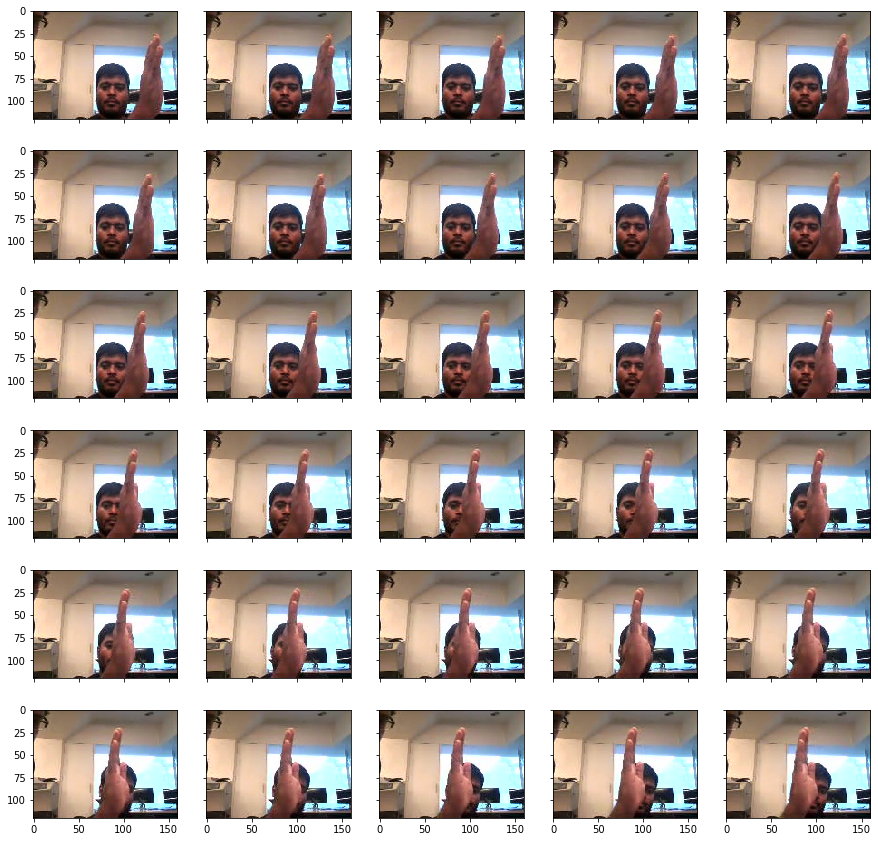

In [8]:
random_train_index = rn.randint(0, len(train_doc))

sequence_dir = train_doc[random_train_index].split(';')[0]

# list of all images in the folder
image_names = os.listdir('data/train/' + sequence_dir)

images = []
for name in image_names:
    img = cv2.imread('data/train/' + sequence_dir + '/' + name)
    images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

print('shape of an image in the selected sequence : {0}'.format(images[0].shape))    
    
plot_image(images)